# 📈 Portfolio Optimization — Mean-Variance Efficient Frontier

---

## Concept:

- Investors seek to maximize return and minimize risk.
- Risk is measured by portfolio variance (or standard deviation).
- The **efficient frontier** is the set of portfolios offering the highest expected return for a given risk level.

---

## Mathematical Formulation:

\[
\min_w \quad w^T \Sigma w
\]

subject to

\[
w^T \mathbf{1} = 1
\]

\[
w^T \mu = \mu_p
\]

Where:

- \( w \): portfolio weights vector
- \( \Sigma \): covariance matrix of asset returns
- \( \mu \): expected returns vector
- \( \mu_p \): target portfolio return

---

### Key Outcome:

Plotting risk (standard deviation) vs expected return yields the **efficient frontier** curve.


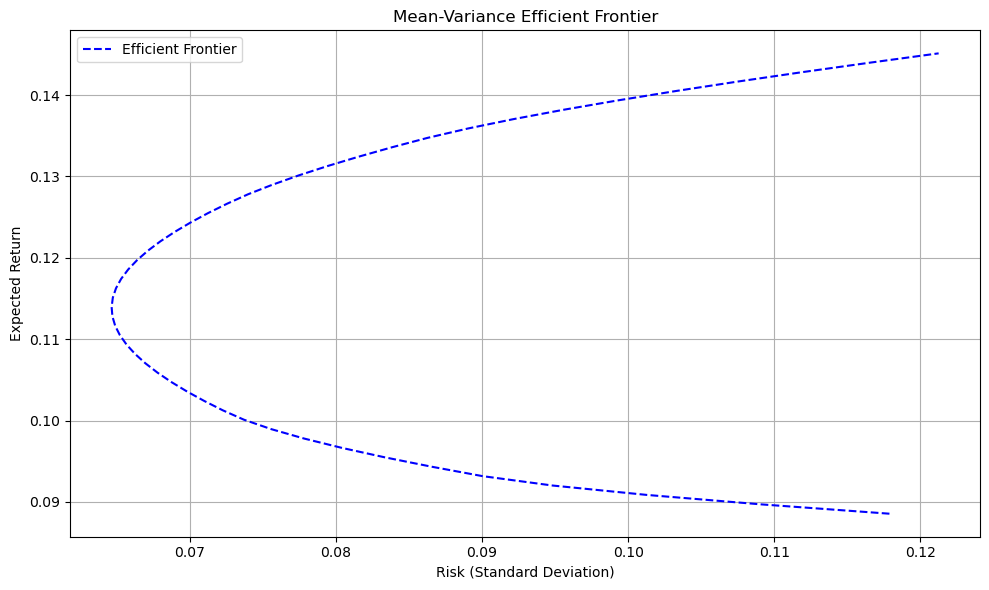

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(42)

# Simulated data: 4 assets
n_assets = 4
n_obs = 1000

# Random returns with some correlation
returns = np.random.multivariate_normal(
    mean=[0.12, 0.10, 0.15, 0.09],
    cov=[[0.010, 0.0018, 0.0011, 0.002],
         [0.0018, 0.012, 0.0019, 0.0025],
         [0.0011, 0.0019, 0.015, 0.0028],
         [0.002, 0.0025, 0.0028, 0.014]],
    size=n_obs
)

# Calculate mean returns and covariance
mu = returns.mean(axis=0)
cov = np.cov(returns, rowvar=False)

# Functions for optimization
def portfolio_variance(weights, cov):
    return weights.T @ cov @ weights

def portfolio_return(weights, mu):
    return weights.T @ mu

# Constraints: sum weights=1, target return fixed
def efficient_frontier(mu, cov, returns_range):
    n = len(mu)
    results = []
    
    for target_return in returns_range:
        constraints = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'eq', 'fun': lambda w: portfolio_return(w, mu) - target_return}
        ]
        bounds = [(0,1) for _ in range(n)]
        initial_guess = np.ones(n) / n
        
        res = minimize(portfolio_variance, initial_guess,
                       args=(cov,), method='SLSQP',
                       bounds=bounds, constraints=constraints)
        
        if res.success:
            results.append((target_return, np.sqrt(res.fun)))
        else:
            results.append((target_return, np.nan))
    return results

# Target returns range
target_returns = np.linspace(mu.min(), mu.max(), 50)

# Calculate efficient frontier
ef = efficient_frontier(mu, cov, target_returns)

# Plot
rets, risks = zip(*ef)
plt.figure(figsize=(10,6))
plt.plot(risks, rets, 'b--', label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Efficient Frontier')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
